In [1]:
import sys
sys.path.append('/scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions')

from SC_function import get_nn_lon_lat_index

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs


In [6]:
mean_era5_loaded = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_era5.nc').tp
mean_uk_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_uk_aligned.nc').pr
mean_germany_aligned = xr.open_dataset('/scratch/nf33/sc5932//Data/regridded/seasonal_germany_aligned.nc').pr
mean_imerg = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_imerg_aligned.nc').precipitation
mean_access = xr.open_dataset('/scratch/nf33/sc5932/Data/regridded/seasonal_access_amip_aligned.nc').pr.rename({'lat': 'latitude', 'lon': 'longitude'})




In [7]:
diff_germany = mean_germany_aligned - mean_era5_loaded
diff_uk = mean_uk_aligned - mean_era5_loaded
diff_imerg = mean_imerg - mean_era5_loaded
diff_access =mean_access- mean_era5_loaded


In [8]:
mean_era5_loaded

<xarray.DataArray 'tp' (season: 4, latitude: 721, longitude: 1440)> Size: 33MB
[4152960 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * season     (season) <U3 48B 'DJF' 'JJA' 'MAM' 'SON'

/scratch/wq02/sc5932/tmp/ipykernel_3853633/2174532515.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/wq02/sc5932/tmp/ipykernel_3853633/2174532515.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/wq02/sc5932/tmp/ipykernel_3853633/2174532515.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/wq02/sc5932/tmp/ipykernel_3853633/2174532515.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


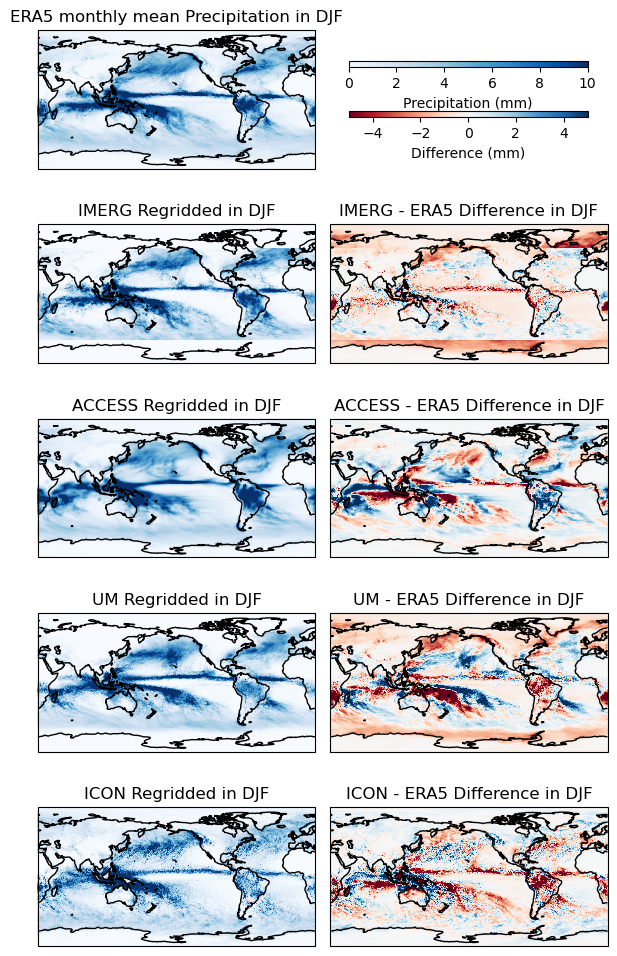

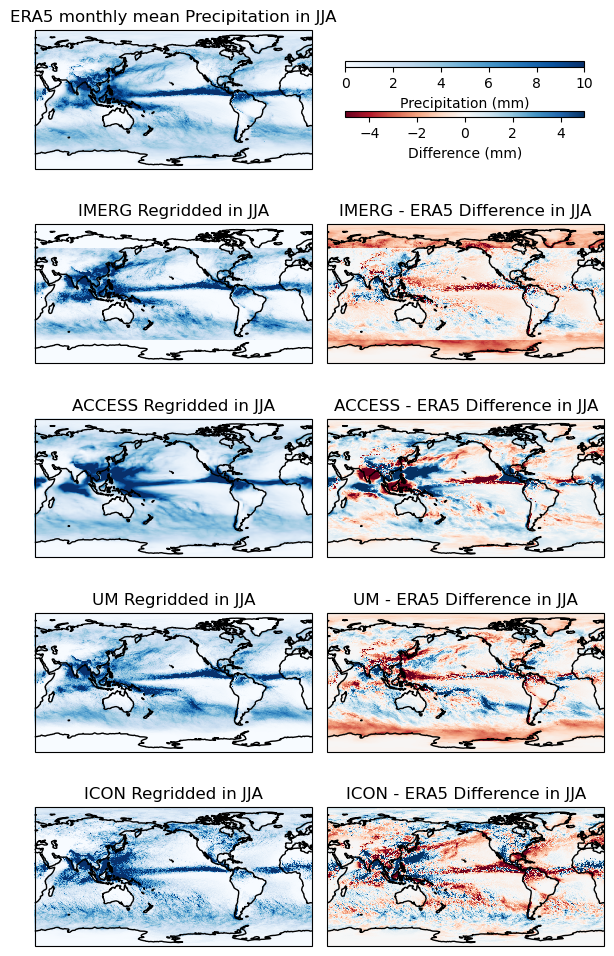

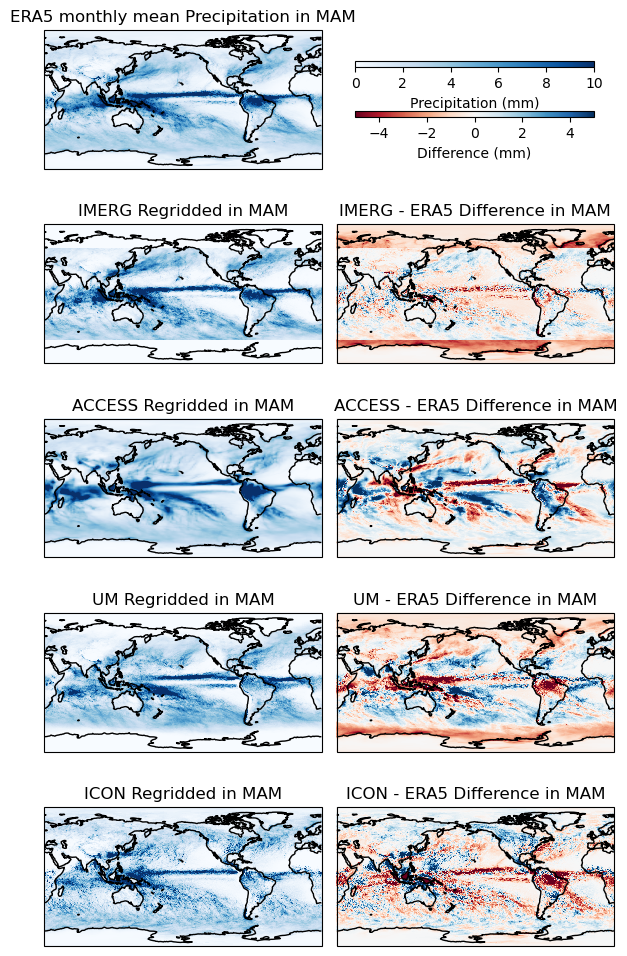

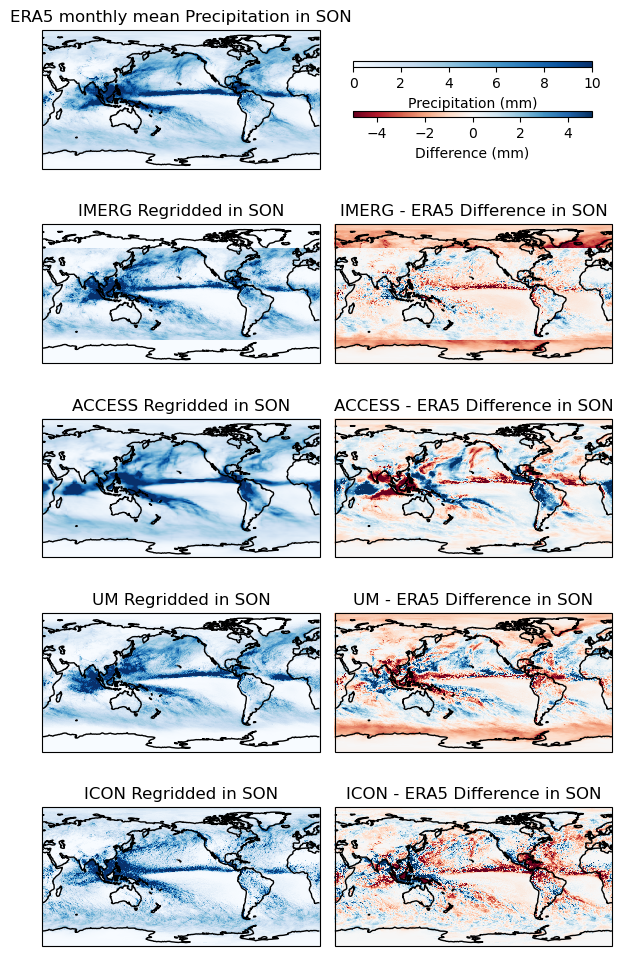

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
for mon in range(4): 
    mon_name = ['DJF', 'JJA', 'MAM', 'SON']
    mean_all = [
        mean_era5_loaded.sel(season = mon_name[mon]),
        mean_imerg.sel(season = mon_name[mon]) ,
        mean_access.sel(season = mon_name[mon]),
        mean_uk_aligned.sel(season = mon_name[mon]),
        mean_germany_aligned.sel(season = mon_name[mon]),
    ]
    diff_all = [diff_imerg .sel(season = mon_name[mon]), 
                diff_access.sel(season = mon_name[mon]),  
                diff_uk.sel(season = mon_name[mon]),
                diff_germany.sel(season = mon_name[mon])]

    # Define projection
    projection = ccrs.PlateCarree(central_longitude=205)

    # Create 2 rows x 3 columns of subplots
    fig, axes = plt.subplots(5, 2, figsize=(6, 10), subplot_kw={'projection': projection})


    # Main color scale (for mean values)
    vmin_main, vmax_main = 0, 10

    # Difference color scale
    vmin_diff, vmax_diff = -5, 5

    # 1. Plot ERA5 Mean
    m0 = mean_all[0].plot(
        ax=axes[0,0],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[0,0].coastlines()
    axes[0,0].set_title('ERA5 monthly mean Precipitation in ' + mon_name[mon] )

    # 2. UK Regridded
    mean_all[1].plot(
        ax=axes[1,0],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[1,0].coastlines()
    axes[1,0].set_title('IMERG Regridded in ' + mon_name[mon])

    mean_all[2].plot(
        ax=axes[2,0],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[2,0].coastlines()
    axes[2,0].set_title('ACCESS Regridded in ' + mon_name[mon])

    mean_all[3].plot(
        ax=axes[3,0],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[3,0].coastlines()
    axes[3,0].set_title('UM Regridded in ' + mon_name[mon])

    mean_all[4].plot(
        ax=axes[4,0],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[4,0].coastlines()
    axes[4,0].set_title('ICON Regridded in ' + mon_name[mon])


    # 4. UK - ERA5
    m1 = diff_all[0].plot(
        ax=axes[1,1],
        cmap='RdBu',
        vmin=vmin_diff,
        vmax=vmax_diff,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[1,1].coastlines()
    axes[1,1].set_title('IMERG - ERA5 Difference in ' + mon_name[mon])

    # 5. Germany - ERA5
    diff_all[1].plot(
        ax=axes[2,1],
        cmap='RdBu',
        vmin=vmin_diff,
        vmax=vmax_diff,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    axes[2,1].coastlines()
    axes[2,1].set_title('ACCESS - ERA5 Difference in ' + mon_name[mon])

    diff_all[2].plot(
        ax=axes[3,1],
        cmap='RdBu',
        vmin=vmin_diff,
        vmax=vmax_diff,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    axes[3,1].coastlines()
    axes[3,1].set_title('UM - ERA5 Difference in ' + mon_name[mon])

    diff_all[3].plot(
        ax=axes[4,1],
        cmap='RdBu',
        vmin=vmin_diff,
        vmax=vmax_diff,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )

    axes[4,1].coastlines()
    axes[4,1].set_title('ICON - ERA5 Difference in ' + mon_name[mon])

    # Use axes[5] for the colorbars
    axes[0,1].axis('off')

    # Get position of axes[5]
    pos = axes[0,1].get_position()

    # Define inset axes for mean and diff colorbars inside axes[5]
    mean_cax = fig.add_axes([pos.x0 - 0.07, pos.y0 + 0.17, 1.8 * pos.width, 0.05 * pos.height])
    diff_cax = fig.add_axes([pos.x0 - 0.07, pos.y0 + 0.12, 1.8 * pos.width, 0.05 * pos.height])

    # Mean colorbar
    cbar_mean = fig.colorbar(m0, cax=mean_cax, orientation='horizontal')
    cbar_mean.set_label('Precipitation (mm)', fontsize=10)

    # Difference colorbar
    cbar_diff = fig.colorbar(m1, cax=diff_cax, orientation='horizontal')
    cbar_diff.set_label('Difference (mm)', fontsize=10)
    plt.tight_layout()
    name_save = "/scratch/nf33/sc5932/Fig/Diff_prcp_5_datasets" + '_in_' + mon_name[mon]
    plt.savefig(name_save , dpi=300, bbox_inches='tight')
